
<h1>Mushroom Classification</h1>

<h2>Links:</h2>

[**Kaggle**](https://www.kaggle.com/uciml/mushroom-classification)

[**Markdown syntax**](https://www.markdownguide.org/basic-syntax/)


In [106]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Data Exploration</h1>

<h2>1. Downloading the dataset into dataframe</h2>

In [107]:
# load data into dataframe

original_data = pd.read_csv('mushrooms.csv')

<h2>2. Review of the different features</h2>

In [108]:
# dataframe's features
original_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [109]:
# All data type are 'object':

original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<h2>3. We should check for alphanumeric values and change them from 'object' to 'float' using encoding methods</h2>


In [110]:
# encoding alphanumeric values using 'label encoding' method

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_data = pd.read_csv('mushrooms.csv')


In [111]:
for i in le_data:
    le_data[i] = le.fit_transform(le_data[i])

In [112]:
le_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [113]:
# encoding alphanumeric values using 'hot-end encoding' method (pd.get_dummies)
one_hot_encoded_training_predictors = pd.get_dummies(original_data)

In [114]:
one_hot_encoded_training_predictors.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


<h2>4. Distribution of the different features</h2>

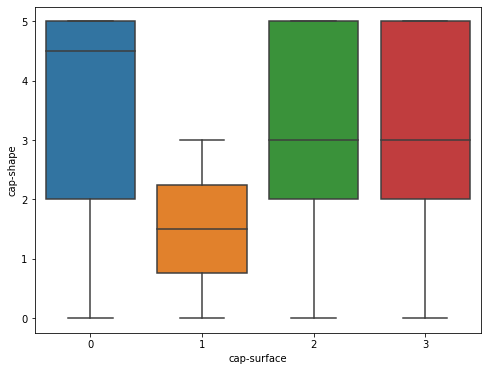

In [115]:
# distribution of different features using 'boxplot'

# box plot cap-surface/cap-shape

var = 'cap-surface'
data = pd.concat([le_data['cap-shape'], le_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="cap-shape", data=data)

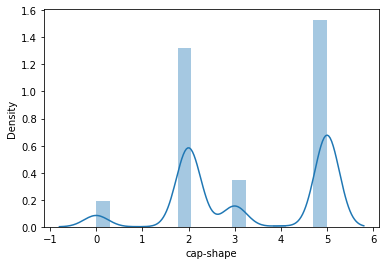

In [116]:
# distribution of different features using 'distplot'

sns.distplot(le_data['cap-shape']);

In [117]:
# pandas profiling report

import pandas_profiling as pp

pp.ProfileReport(original_data, title = 'Pandas Profiling report of data', html = {'style':{'full_width': True}})

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


<h2>5. Checking for missing values</h2>

In [118]:
# we can see that 'veil-type' is a constant so we should remove it from the datasaet

le_sorted_data = le_data.drop(['veil-type'], axis=1)
ho_sorted_data = one_hot_encoded_training_predictors.drop(['veil-type_p'], axis=1)

<h2>6. Plotting the correlation matrix</h2>

In [119]:
# displaying the correlation matrix using the 'hotone encoded' data

le_matrix = pd.get_dummies(le_sorted_data)
le_matrix.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


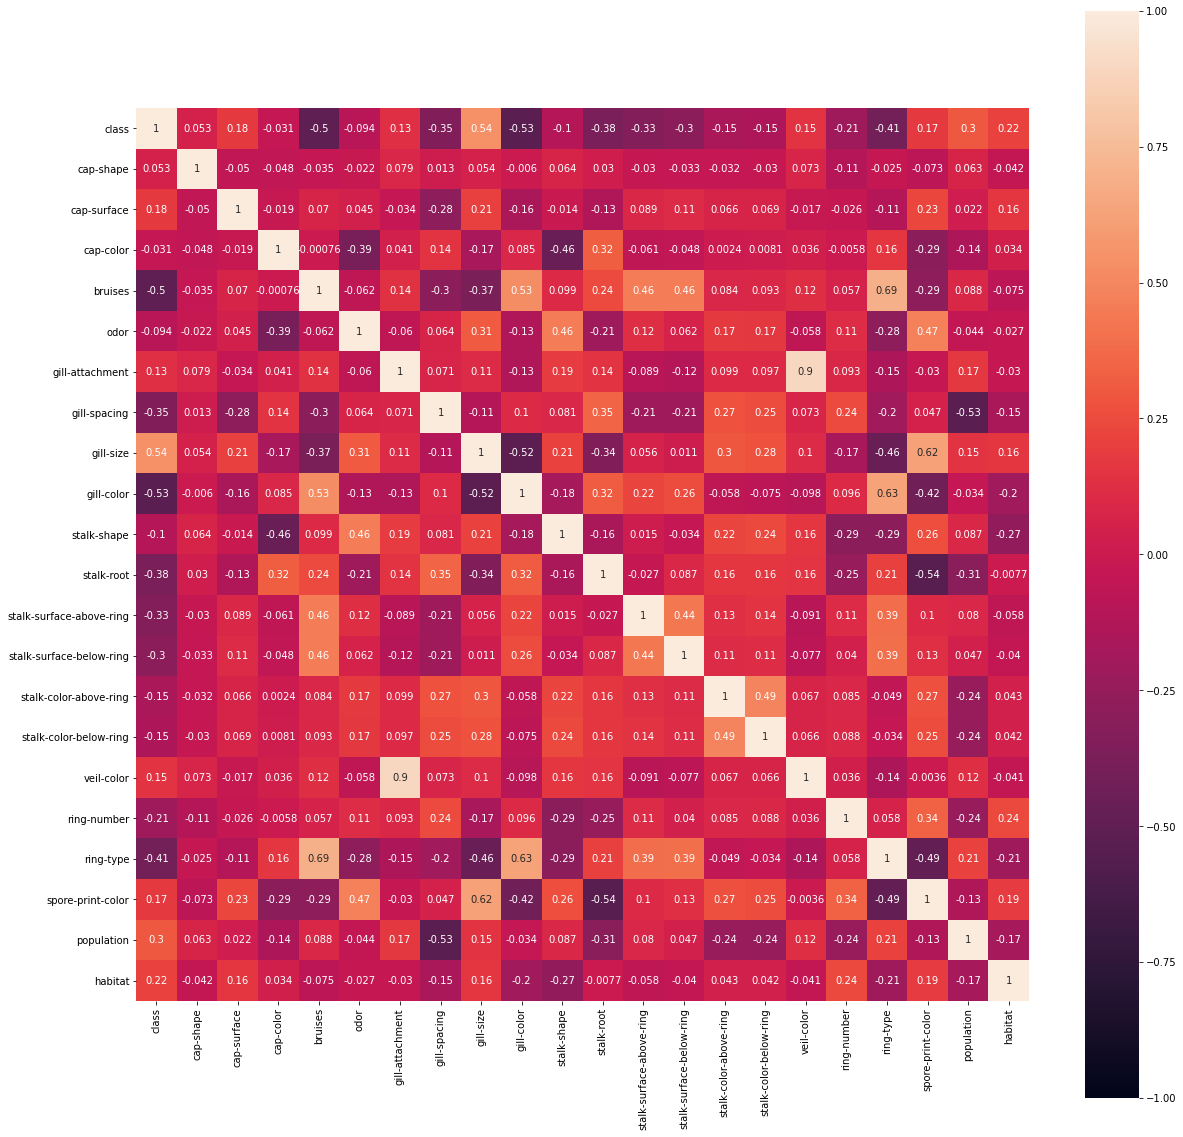

In [120]:
plt.figure(figsize=(20, 20))
corrMatrix = le_matrix.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

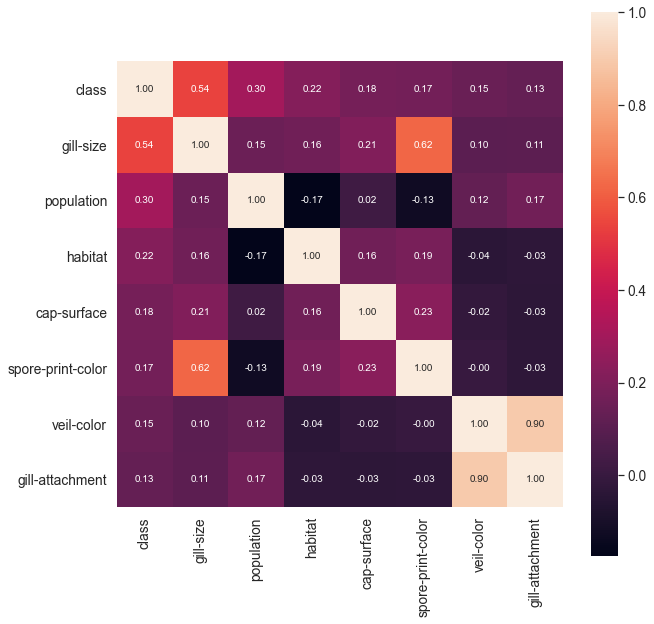

In [126]:
#class correlation matrix

plt.figure(figsize=(10, 10))
k = 8 #number of variables for heatmap
cols = corrMatrix.nlargest(k, 'class')['class'].index
cm = np.corrcoef(le_matrix[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<h2>7. Identify the most important features the highly correlat with poisonous</h2>

In my opinion the most segnificant featurs are: gill size, population, habitat, cap-surface, spore print color, veil color and gill attachment

<h1>Model Development</h1>

<h2>8. Splitting the dataset into 3 parts: Training, Validation, and Test</h2>